<a href="https://colab.research.google.com/github/ravising-h/MXNET-gluoncv/blob/master/MXNetGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu101

     |████████████████████████████████| 551.3MB 31kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
!pip install gluoncv

     |████████████████████████████████| 512kB 6.4MB/s 


In [0]:
import mxnet as mx
import gluoncv as gcv

In [4]:
image_url = "https://komonews.com/resources/media/5cb89328-549c-4d02-8809-1090f2e14bfd-large16x9_baker_randy_small.jpg"
file_path = "mt_baker.jpg"
gcv.utils.download(url = image_url,path = file_path)

100%|██████████| 82/82 [00:00<00:00, 254.35KB/s]


'mt_baker.jpg'

In [0]:
image =  mx.image.imread("mt_baker.jpg")

In [16]:
image.shape

(555, 986, 3)

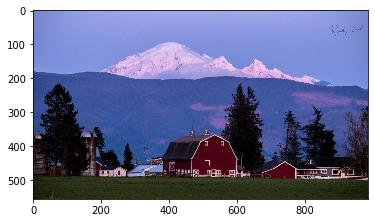

In [17]:
import matplotlib.pyplot as plt
plt.imshow(image.asnumpy());

In [0]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [19]:
network = gcv.model_zoo.get_model("resnet50_v1d",pretrained  = True)

Model file is not found. Downloading.


55464KB [00:02, 23297.05KB/s]                           


In [0]:
prediction = network(image)

In [21]:
prediction.shape

(1, 1000)

In [0]:
pred_proba = mx.nd.softmax(prediction)

In [0]:
k = 5
top = mx.nd.topk(pred_proba, k = k)

In [43]:
for i in range(k):
  class_of_image = top[0,i].astype("int").asscalar()
  classs_name = network.classes[class_of_image]
  class_proba = pred_proba[0,class_of_image].asscalar()*100
  print(classs_name,class_proba,sep= " = ",end = "%\n");

barn = 66.09604954719543%
alp = 8.57490748167038%
boathouse = 0.9657789953052998%
volcano = 0.7013886235654354%
lakeside = 0.3934906329959631%


In [86]:
image_url = "https://www.sebalter.net/u/2019/10/how-to-draw-a-sunset-background-with-colored-beautiful-scenery-pencil-and-sunrise-908x606.jpg"
file_path = "view1.jpg"
gcv.utils.download(url = image_url,path = file_path)

'view1.jpg'

In [0]:
image =  mx.image.imread("view1.jpg")

In [88]:
image.shape

(606, 908, 3)

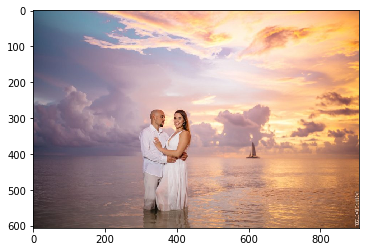

In [89]:
plt.imshow(image.asnumpy());

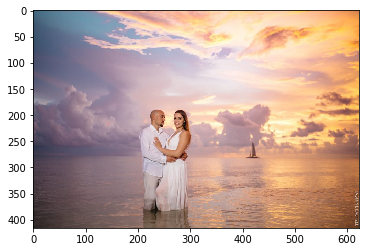

In [90]:
image,chw_image = gcv.data.transforms.presets.yolo.transform_test(image)
plt.imshow(chw_image);

In [0]:
network = gcv.model_zoo.get_model("yolo3_darknet53_coco",pretrained  = True)

In [0]:
prediction = network(image)

In [93]:
type(prediction)

tuple

In [94]:
for i,pred in enumerate(prediction):
  print(i,pred.shape)

0 (1, 100, 1)
1 (1, 100, 1)
2 (1, 100, 4)


In [0]:
predicction = [array[0] for array in prediction]
class_ind,probability,bbox = prediction

In [96]:
network.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [0]:
k = 2

In [98]:
probability[0,:k]


[[0.9011145]
 [0.8185869]]
<NDArray 2x1 @cpu(0)>

In [99]:
class_ind[0,:k]


[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

In [100]:
bbox[0,:k]


[[227.99925 195.64551 301.5053  387.46936]
 [203.10043 190.7284  261.5986  392.9137 ]]
<NDArray 2x4 @cpu(0)>

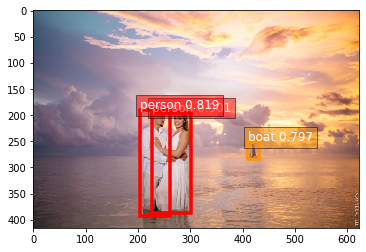

In [102]:
gcv.utils.viz.plot_bbox(chw_image,bbox[0],probability[0],class_ind[0],class_names = network.classes);

In [104]:
gcv.model_zoo.get_model_list()

dict_keys(['resnet18_v1', 'resnet34_v1', 'resnet50_v1', 'resnet101_v1', 'resnet152_v1', 'resnet18_v2', 'resnet34_v2', 'resnet50_v2', 'resnet101_v2', 'resnet152_v2', 'se_resnet18_v1', 'se_resnet34_v1', 'se_resnet50_v1', 'se_resnet101_v1', 'se_resnet152_v1', 'se_resnet18_v2', 'se_resnet34_v2', 'se_resnet50_v2', 'se_resnet101_v2', 'se_resnet152_v2', 'vgg11', 'vgg13', 'vgg16', 'vgg19', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'alexnet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'squeezenet1.0', 'squeezenet1.1', 'inceptionv3', 'xception', 'xception71', 'mobilenet1.0', 'mobilenet0.75', 'mobilenet0.5', 'mobilenet0.25', 'mobilenetv2_1.0', 'mobilenetv2_0.75', 'mobilenetv2_0.5', 'mobilenetv2_0.25', 'mobilenetv3_large', 'mobilenetv3_small', 'ssd_300_vgg16_atrous_voc', 'ssd_300_vgg16_atrous_coco', 'ssd_300_vgg16_atrous_custom', 'ssd_512_vgg16_atrous_voc', 'ssd_512_vgg16_atrous_coco', 'ssd_512_vgg16_atrous_custom', 'ssd_512_resnet18_v1_voc', 'ssd_512_resnet18_v1_coco', 'ssd